In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import ExponentialSmoothing
# Mitä pienempiä tunnuslukuja, sitä parempi ennuste
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
# Tuodaan dataa oluenvalmistuksesta 
# Akin valmiiksi antamilla parametreillä

df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


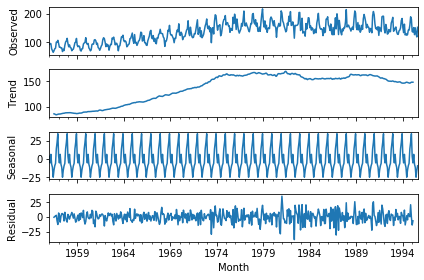

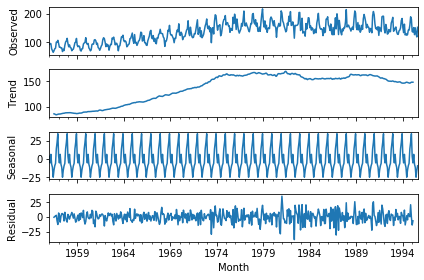

In [3]:
# Hyvä työkalu alkuperäisen aikasarjan tarkasteluun ja nopeaan vilkaisuun
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Monthly beer production']).plot()

In [30]:
# Havaitaan, että kausivaihtelu on todella tasaista ja ennustettavissa,
# sekä aiemmin nouseva trendi, joka nyt on lakannut

# Käytetään ExponentialSmoothing -mallia ja sovitetaan data siihen

malli = ExponentialSmoothing(df['Monthly beer production'], seasonal_periods=12, trend='add', seasonal='mul', freq='MS').fit()

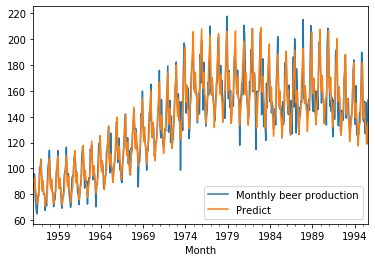

In [31]:
df['Predict'] = malli.fittedvalues
df.plot()

In [32]:
sqrt(mean_squared_error(df['Monthly beer production'], df['Predict']))

9.73908181232376

In [20]:
mean_absolute_error(df['Monthly beer production'], df['Predict'])

7.3587009329279445

In [8]:
df.tail()

,Monthly beer production,Predict
Month,,
1995-04-01,127.0,143.573910
1995-05-01,151.0,133.523119
1995-06-01,130.0,150.371118
1995-07-01,119.0,130.323941
1995-08-01,153.0,123.851717


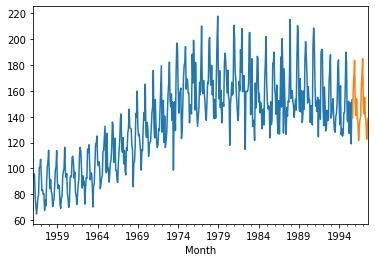

In [46]:
# Indexoidaan uuteen dataframeen toteuneen datan viimeisestä datapisteestä (syyskuu-95)
# eteenpäin 24 kk
# Frekvenssinä MonthStart, jotta datan ulkoasu pysyy yhtenäisenä
index = pd.date_range('1995-09-01', periods=24, freq='MS')

# Ennustetaan valitsemallamme mallilla 24kk eteenpäin, 
# käytetään indexinä äsken tekemäämme indexiä
df1 = pd.DataFrame(malli.forecast(24), index=index)
df1.columns = ['Predict']

# Plotataan havainnot
df['Monthly beer production'].plot()
df1['Predict'].plot()

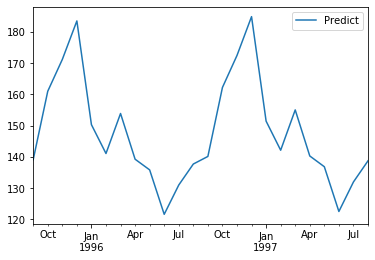

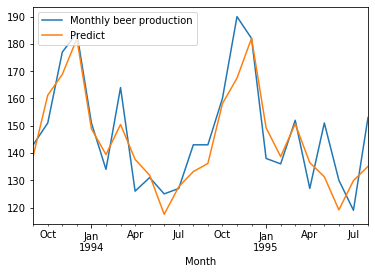

In [42]:
# Plotataan ennustamamme 24 kuukautta sekä plotataan viimeisin toteutunut 24 kuukautta 
# sekä sen ennuste
df1.plot()
df.tail(24).plot()
